# 第 1 章 计量经济学的性质与经济数据

In [1]:
library(wooldridge)


## C1.1【均值；样本量】
### 本题使用 WAGE1.RAW 中的数据
（1）求出样本中的平均受教育程度。最低和最高受教育年数是多少？

（2）求出样本中的平均小时工资。它看起来是高是低？

（3）工资数据用 1976 年的美元报告。利用（2004 年或以后的）《总统经济报告》，求出并 报告 1976 年和 2003 年的消费者价格指数（CPI）

（4）利用（3）部分的 CPI 值，求以 2003 年美元度量的平均小时工资。现在，平均小时工资看起来合理了吗？

（5）样本中有多少女人和男人？

In [2]:
data(wage1)#在 RStudio 中导入 WAGE1 
attach(wage1) #绑定数据集 WAGE1

（1）求出样本中的平均受教育程度。最低和最高受教育年数是多少？

In [3]:
mean(educ) #求均值 
min(educ) #求最小值 
max(educ) #求最大值
summary(educ) #我们还可以通过描述性统计一次性获得以上统计量

[1] 12.56274

[1] 0

[1] 18

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   12.00   12.00   12.56   14.00   18.00 

（2）求出样本中的平均小时工资。它看起来是高是低？

In [4]:
mean(wage) #求均值 可得到均值为 5.896103 美元/小时，看上去比较低

[1] 5.896103

（3）工资数据用 1976 年的美元报告。利用（2004 年或以后的）《总统经济报告》，求出并 报告 1976 年和 2003 年的消费者价格指数（CPI）。
根据 2004 Economic Report of the President 的表 B-601，1976 年的 CPI 是 56.9，2003 的 CPI 是184.0 。本小题不用计算，直接查表即可。

（4）利用（3）部分的 CPI 值，求以 2003 年美元度量的平均小时工资。现在，平均小时工资看起来合理了吗？

In [5]:
184/56.9* mean(wage) #用 2003 年美元度量平均小时工资

[1] 19.06648

（5）样本中有多少女人和男人？

In [10]:
sum(female) #由于 female 变量中是女性的观测赋值 1，男性为 0，所以直接求和即可得到女性观测总量。
length(female)-sum(female) #length()可求得总共有多少个观测，总个体减去女性个体即为男性个体总数。

[1] 252

[1] 274

## C1.2【缺失值；按条件选入观测；条件计数】
### 回答本题需要使用 BWGHT.RAW 中的数据。
（1）样本中有多少妇女，又有多少人报告在怀孕期间抽烟？

（2）平均每天抽烟数量是多少？平均数作为这个案例中“典型”妇女的度量指标好吗？请解释。

（3）怀孕期间抽烟的妇女中，平均每天抽烟数量是多少？与第（2）部分中的答案有何区别，为什么？

（4）求出样本中 fatheduc 的平均值。为何只用 1192 个观测计算这个平均值？

（5）报告平均家庭收入及其标准误，以美元为单位。

In [11]:
data(bwght)

In [31]:
BWGHT<-bwght
attach(BWGHT)

The following object is masked _by_ .GlobalEnv:

    bwght

The following object is masked from package:wooldridge:

    bwght



（1）样本中有多少妇女，又有多少人报告在怀孕期间抽烟？

In [13]:
BWGHT[!complete.cases(BWGHT),] #该命令可以列出矩阵或数据框中有一个或者多个缺失值的行。

,faminc,cigtax,cigprice,bwght,fatheduc,motheduc,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
3,0.5,16.5,122.3,129,NA,12,2,0,0,0,4.859812,8.0625,0.00,-0.6931472
13,6.5,16.5,122.3,61,NA,12,3,1,0,0,4.110874,3.8125,0.00,1.8718022
18,4.5,16.5,122.3,154,NA,11,1,0,0,0,5.036952,9.6250,0.00,1.5040774
20,6.5,16.5,122.3,138,NA,11,2,0,0,0,4.927254,8.6250,0.00,1.8718022
27,2.5,16.5,122.3,79,NA,12,2,1,0,0,4.369448,4.9375,0.00,0.9162908
30,0.5,15.0,125.6,134,NA,12,2,1,0,0,4.897840,8.3750,0.00,-0.6931472
64,0.5,15.0,125.6,104,NA,12,2,0,0,10,4.644391,6.5000,0.50,-0.6931472
65,3.5,15.0,125.6,114,NA,11,3,0,1,0,4.736198,7.1250,0.00,1.2527629
77,0.5,21.0,127.7,115,NA,10,5,0,0,0,4.744932,7.1875,0.00,-0.6931472


Loading required package: lattice

Attaching package: 'mice'

The following objects are masked from 'package:base':

    cbind, rbind



,faminc,cigtax,cigprice,bwght,parity,male,white,cigs,lbwght,bwghtlbs,packs,lfaminc,motheduc,fatheduc,
1191,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
196,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1
,0,0,0,0,0,0,0,0,0,0,0,0,1,196,197


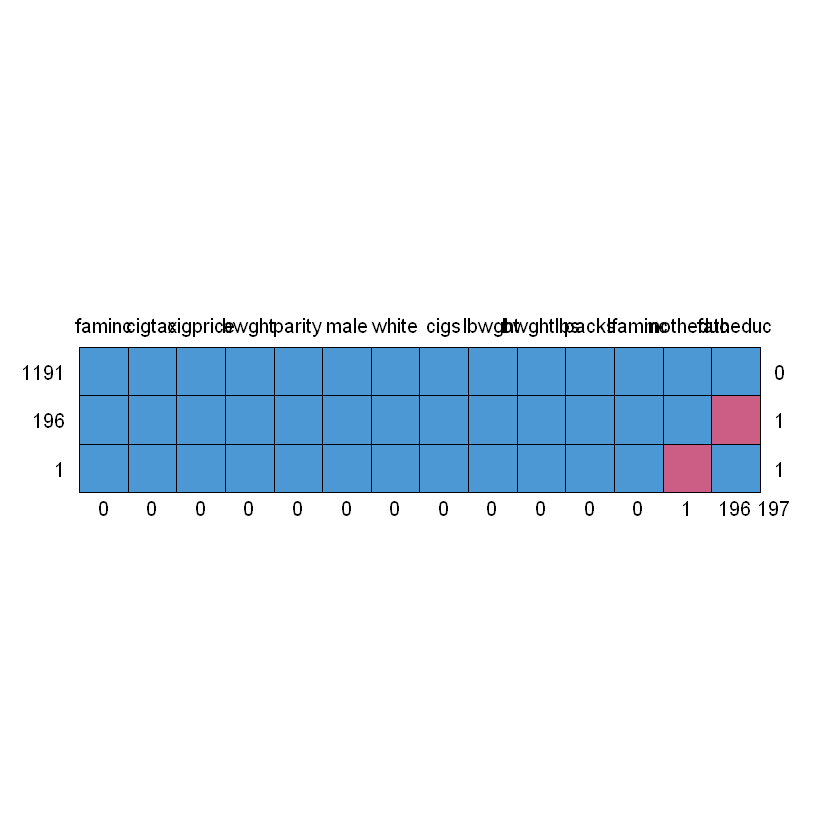

In [14]:
library(mice)
md.pattern(BWGHT) #缺失值分在的不同变量中mice 包中的 md.pattern()函数能够轻松实现这一功能。返回的结果告诉我们在 fatheduc 变量上有缺失值的观测有196 个，而在 motheduc 上有缺失值的观测有 1 个。

In [30]:
length(fatheduc) # 由于该数据集中的观测是妇女的宝宝的情况，所以一个观测对应着一名妇女。我们只需随意取一个变量，测量其观测值数量即可。值得一提的是，缺失值仍然会计算为一个观测。例如 fatheduc 中有 196 个缺失值，而 faminc 中没有缺失值，但 length(fatheduc)和 length(faminc)都得到 1388。所以一共有 1388 名妇女。
table(cigs) #为了求得有多少人报告在怀孕期间抽烟，我们可以把 cigs 变量做个频数统计。我们看到 cigs 为 0 的共有 1176 人，那么抽烟的人就是 1388-1176=212 人。

ERROR: Error in eval(expr, envir, enclos): 找不到对象'fatheduc'


In [ ]:
a<-BWGHT[cigs>0,]
a #我们也可以把 cigs 大于 0 的观测提取出来保存在 a 中，然后展现 a，发现其是 212 x 14 的表，说明有 212 个观测的 cigs 大于 0。

（2）平均每天抽烟数量是多少？平均数作为这个案例中“典型”妇女的度量指标好吗？请解释。

In [ ]:
mean(cigs) 
#求平均数得到 2.087176。通过之前的 table(cigs)由我们可以发现绝大部分妇女是不抽烟的，而且存在几个几个嗜烟如命的人，
#例如有人一天抽 50 只烟！因此，说一个典型的妇女每日抽烟 2 只并不具备代表性。

（3）怀孕期间抽烟的妇女中，平均每天抽烟数量是多少？与第（2）部分中的答案有何区别， 为什么？

In [ ]:
mean(a$cigs) 
#我们之前把抽烟的观测都保存在了数据集 a 中，我们再计算 a$cigs 的平均值就 怀孕期间抽烟的妇女的平均吸烟数
#这个值计算出来是 13.66509。我们发现这一平均值远远大于第（2）部分中的答案。更加证实了（2）中的答案不能代表“典型”的妇女。。

（4）求出样本中 fatheduc 的平均值。为何只用 1192 个观测计算这个平均值？


In [ ]:
mean(fatheduc,na.rm = TRUE) 
#由于 fatheduc 存在缺失值，我们直接在 mean()中定义 na.rm =TRUE 来计算排除缺失值的平均值。
#只用 1192 个观测计算这个平均值是因为 fatheduc 有 196 个缺失值。

（5）报告平均家庭收入及其标准误，以美元为单位。

In [ ]:
income<-1000*faminc #将家庭收入换算成美元（faminc 是以千美元为单位的），保存在income 中。
mean(income) #平均家庭收入为 29026.66。
std <- function(x) sd(x)/sqrt(length(x)) #我们编写一个标准误的公式。 
std(income) #得到标准误为 502.9888。

##  C1.3【按条件选入观测；皮尔森相关系数】
### MEAP01.RAW 中的数据是 2001 年密歇根州的数据。利用这些数据回答如下问题。
（1）求出 math4 的最大值和最小值。这个范围合理吗？请解释。

（2）有多少学校在数学测试中有 100%的通过率？占整个样本的百分比是多少？

（3）有多少学校的数学通过率刚好是 50%？

（4）比较数学和阅读的平均通过率。哪个测试更难通过？

（5）求出 math4 和 read4 之间的相关系数。你得到的结论是什么？

（6）变量 exppp 是平均每个学生的支出。求出 exppp 的平均值和标准差。你认为学生均支出 存在大幅差异吗？

（7）假设学校 A 平均每个学生支出 6000 美元，学校 B 平均每个学生支出 5500 美元。学校 A 的支出超过学校 B 的支出百分之多少？与根据自然对数之差近似的百分比差异 $100*[\log(6000)- \log(5500)]$进行比较。（参加附录 A 中的 A.4 节）


The following objects are masked from meap01 (pos = 5):

    bcode, dcode, enroll, expend, exppp, lenroll, lexpend, lexppp,
    lunch, math4, read4



 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,dcode,bcode,math4,read4,lunch,enroll,expend,exppp,lenroll,lexpend,lexppp,
1823,1,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0


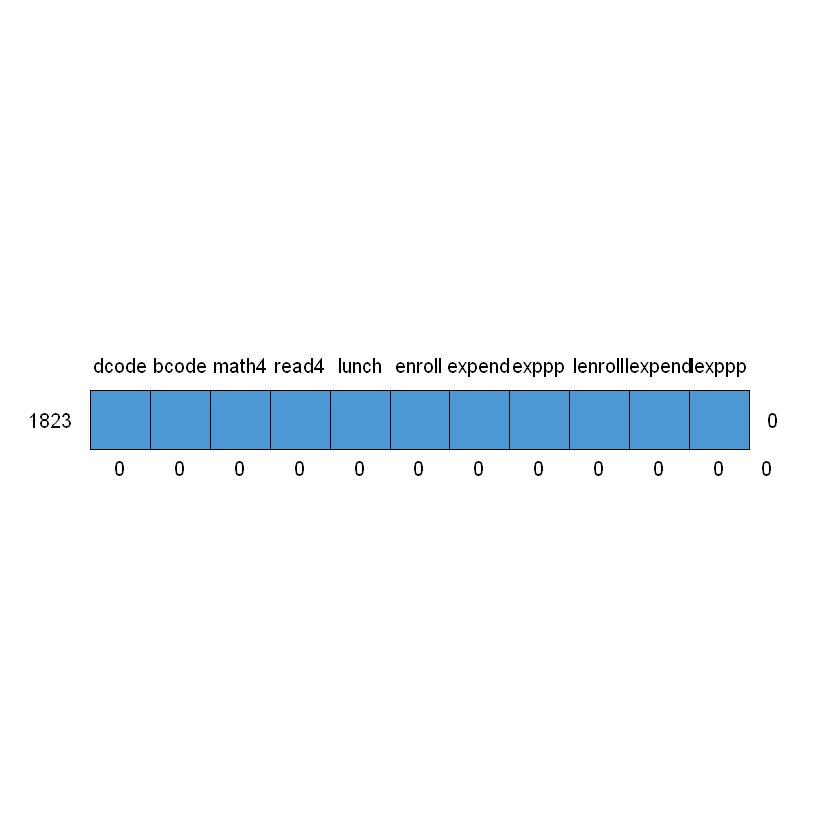

In [32]:
data(meap01)
attach(meap01)
library(mice)
md.pattern(meap01) #检查一下是否有缺失值。结果是没有。

（1）求出 math4 的最大值和最小值。这个范围合理吗？请解释。

In [17]:
min(math4) 
max(math4) 
summary(math4) 

[1] 0

[1] 100

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   61.60   76.40   71.91   87.00  100.00 

（2）有多少学校在数学测试中有 100%的通过率？占整个样本的百分比是多少？

In [18]:
a<-meap01[math4==100,] #选入 math4 等于 100 的观测并保存在 a 中。
length(a$math4) #统计有多少学校在数学测试中有 100%的通过率，结果为 38。
length(a$math4)/length(math4) #计算在数学测试中有 100%的通过率的学校占整个样本的百分 比。注意分母是全体样本的个数。

[1] 38

[1] 0.02084476

（3）有多少学校的数学通过率刚好是 50%？

In [19]:
b<-meap01[math4==50,] #选入 math4 等于 50 的观测并保存在 b 中。
length(b$math4) 

[1] 17

（4）比较数学和阅读的平均通过率。哪个测试更难通过？

In [20]:
mean(math4) 
mean(read4) 

[1] 71.909

[1] 60.06188

（5）求出 math4 和 read4 之间的相关系数。你得到的结论是什么？

In [21]:
cor(math4,read4,method = "pearson") 
#计算 math4 和 read4 之间的皮尔森相关系数，结果为 0.8427281。这是比较高的相关度，说明在数学考试中表现较好的学校，在阅读考试中表现也 较好。


[1] 0.8427281

（6）变量 exppp 是平均每个学生的支出。求出 exppp 的平均值和标准差。你认为学生均支出 存在大幅差异吗？

In [22]:
mean(exppp) #求学生的平均支出，得到 5194.865。
sd(exppp) #求学生支出的标准差，得到 1091.89。这表示学生的支出存在大幅差异。

[1] 5194.865

[1] 1091.89

（7）假设学校 A 平均每个学生支出 6000 美元，学校 B 平均每个学生支出 5500 美元。学校 A 的支出超过学校 B 的支出百分之多少？与根据自然对数之差近似的百分比差异 100*[log(6000)- log(5500)]进行比较。（参加附录 A 中的 A.4 节。）


In [23]:
(6000-5500)/5500 #学校 A 的支出超过学校 B 的支出百分之多少，得到 0.09090909，与等于 9.1%。
100*(log(6000)-log(5500))  #求自然对数之差近似的百分比差异，得到 8.701138。这和上面的9.1%比较接近。

[1] 0.09090909

[1] 8.701138

## C1.4【按条件整合数据；T 检验】
### JTRAIN2.RAW 中的数据，来自 1976-1977 年对低收入男性进行的一项工作培训实验；参见Lalonde(1986)。

（1）利用指标变量 train 来确定得到工作培训的男性比例。

（2）变量 re78 是 1978 年得到的工资，以 1982 年的美元度量。针对得到工作培训的男性样本 和未得到工作培训的男性样本，分别计算 re78 的平均值。二者在经济上的差别大吗？

（3）变量 unem78 是表示一个男人在 1978 年是否失业的指标变量。得到工作培训者的失业比 例是多少？没有得到工作培训者呢？评论两者之间的差异。

（4）根据第（1）部分和第（2）部分，工作培训项目看来有效吗？如何使我们的结论更有说 服力？


The following objects are masked from wage1:

    educ, married



 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,train,age,educ,black,hisp,married,nodegree,mosinex,re74,re75,re78,unem74,unem75,unem78,lre74,lre75,lre78,agesq,mostrn,
445,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


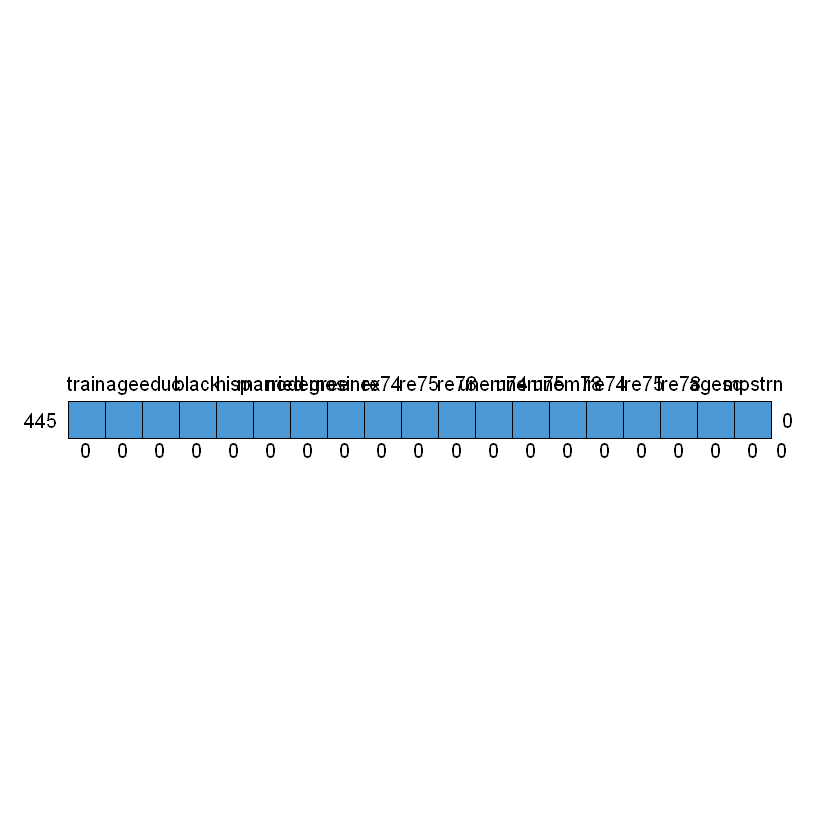

In [24]:
data(jtrain2)
attach(jtrain2)
md.pattern(jtrain2)
JTRAIN2<-jtrain2

（1）利用指标变量 train 来确定得到工作培训的男性比例

In [25]:
sum(train)/length(train) 

[1] 0.4157303

（2）变量 re78 是 1978 年得到的工资，以1982年的美元度量。针对得到工作培训的男性样本 和未得到工作培训的男性样本，分别计算 re78 的平均值。二者在经济上的差别大吗？

In [35]:
list(train)

[[1]]
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0

In [33]:
a<-aggregate(JTRAIN2["re78"],by=list(train),FUN=mean,na.rm=TRUE) #用 aggregate 命令（《R语言实战》第 101 页）针对得到工作培训的男性样本和未得到工作培训的男性样本，分别计算 re78 的平均值，结果保存在 a 中。
a #展示结果。可以发现有培训的男性的工资是 6.35，没有培训的男性的工资是 4.55。在经济 上差别较大。

Group.1,re78
<int>,<dbl>
0,4.554802
1,6.349145


（3）变量 unem78 是表示一个男人在 1978 年是否失业的指标变量。得到工作培训者的失业比 例是多少？没有得到工作培训者呢？评论两者之间的差异。


In [27]:
b<-aggregate(JTRAIN2["unem78"],by=list(train),FUN=mean,na.rm=TRUE) #用 aggregate 命令（《R 语言实战》第 101 页）针对得到工作培训的男性样本和未得到工作培训的男性样本，分别计 算 unem78 的平均值（由于 unem78 在某个体失业时为 1，没有失业为 0，其平均值就是失业 者的占比），结果保存在 b 中。
b

Group.1,unem78
<int>,<dbl>
0,0.3538462
1,0.2432432


（4）根据第（1）部分和第（2）部分，工作培训项目看来有效吗？如何使我们的结论更有说服力？
第（1）部分和第（2）部分的比较都是基于经济学的比较，没有基于统计学的比较。如果要有信服力的话需要做统计学上的显著性检验。

In [28]:
t.test(re78~train) #对 re78 做 T 检验，结果 p-value = 0.007893，我们可以拒绝认为得到工作培训者的工资均值和没有得到工作培训者的工资均值相同。（《R 语言实战》第 151 页）


	Welch Two Sample t-test

data:  re78 by train
t = -2.6741, df = 307.13, p-value = 0.007893
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.1146754 -0.4740108
sample estimates:
mean in group 0 mean in group 1 
       4.554802        6.349145 


In [29]:
t.test(unem78~train) #对unem78做T检验，结果 p-value = 0.01117，我们可以拒绝认为得到工作培训者的失业比例均值和没有得到工作培训者的失业比例均值相同。（《R 语言实战》第 151 页）


	Welch Two Sample t-test

data:  unem78 by train
t = 2.5487, df = 419.79, p-value = 0.01117
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.02530292 0.19590291
sample estimates:
mean in group 0 mean in group 1 
      0.3538462       0.2432432 
